# Trabajo 1 - Procesamiento Digital de Imágenes

Realizado por:
- Antonia Yepes
- Daniel Barrera


In [1]:
import pydicom
import matplotlib.pyplot as plt
from pydicom.data import get_testdata_file
from pydicom import dcmread
import numpy as np
import pandas as pd
import os


## 1. Analisis de metadatos DICOM y visualización

In [4]:
# se lee el archivo dicom
file_path = 'Patient02/1/1.2.840.113564.1016726191.20221231195622993510.1203801020003.dcm'
dcm_data = pydicom.dcmread(file_path)

dcm_data


Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 178
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Computed Radiography Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113564.1016726191.20221231195622993510.1203801020003
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.2.773
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 192'
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY']
(0008, 0016) SOP Class UID                       UI: Computed Radiography Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.840.113564.1016726191.20221231195622993510.1203801020003
(0008, 0020) Study Date                          DA: '20221231'
(0008, 0

Al observar la metadata del archivo dicom, se puede observar que la modalidad es `'CR'`, lo que significa que se trata de una radiografía computarizada.

Ahora se procede a organizar la metadata extraída en Name, Tag, Type y Value. Para posteriormente explicar a qué hace referencia cada uno de ellos, el grupo al que pertenece, su relevancia y los valores válidos para ese metadato.

In [5]:
# se leen los keywords
'Scanner Model' in dcm_data.dir()

False

In [6]:
dcm_data.dir()

['AccessionNumber',
 'AcquisitionDate',
 'AcquisitionDeviceProcessingCode',
 'AcquisitionDeviceProcessingDescription',
 'AcquisitionNumber',
 'AcquisitionTime',
 'AdmissionID',
 'AnatomicRegionSequence',
 'BitsAllocated',
 'BitsStored',
 'BodyPartExamined',
 'BurnedInAnnotation',
 'CassetteOrientation',
 'CassetteSize',
 'CollimatorGridName',
 'Columns',
 'ContentDate',
 'ContentTime',
 'DateOfLastCalibration',
 'DeviationIndex',
 'DeviceSerialNumber',
 'Exposure',
 'ExposureIndex',
 'ExposureTime',
 'ExposuresOnPlate',
 'GantryID',
 'HighBit',
 'ImageComments',
 'ImageType',
 'ImagerPixelSpacing',
 'InstanceNumber',
 'InstitutionAddress',
 'InstitutionName',
 'InstitutionalDepartmentName',
 'KVP',
 'LossyImageCompression',
 'Manufacturer',
 'ManufacturerModelName',
 'Modality',
 'PatientAge',
 'PatientBirthDate',
 'PatientID',
 'PatientName',
 'PatientOrientation',
 'PatientPosition',
 'PatientSex',
 'PatientSize',
 'PatientWeight',
 'PerformedProcedureStepDescription',
 'PerformingPh

En la metadata de nuestra imagen no se encontraba el termino de `'Scanner Model'`. Este termino generalmente se refiere al modelo del equipo utilizado para adquirir la imagen. El keyword estándar para esto es `'ManufacturerModelName'`

Por otro lado se ha notado que los terminos `'Detector Active Shape'` (Se refiere a la forma geométrica del área activa del detector de imagen) y `'Detector Description'` (Se refiere a una descripción textual que proporciona detalles adicionales sobre el detector de imagen) no se encontraban en la metadata de la imagen. La ausencia estos términos en los data elements del archivo DICOM analizado se debe a que la inclusión de determinados atributos en la metadata depende tanto del fabricante del equipo como de la modalidad y configuración utilizada durante la adquisición de la imagen. No todos los campos definidos por el estándar DICOM son obligatorios para todos los estudios, por lo que es común que algunos atributos específicos no estén presentes si el equipo no los registra o si no son requeridos para ese tipo de procedimiento [1]. Por esta razón, dichos términos no aparecen entre los keywords disponibles en la metadata del archivo evaluado.

In [7]:
# se definen los datos de acuerdo a la modalidad
data_elements = [
    'PatientName',
    'Modality',
    'ViewPosition',
    'BodyPartExamined',
    'RelativeXRayExposure',
    'PhotometricInterpretation',
    'Manufacturer',
    'ManufacturerModelName'
]

for i in data_elements:
    print(dcm_data.data_element(i))

(0010, 0010) Patient's Name                      PN: 'anonymize'
(0008, 0060) Modality                            CS: 'CR'
(0018, 5101) View Position                       CS: 'AP'
(0018, 0015) Body Part Examined                  CS: 'CHEST'
(0018, 1405) Relative X-Ray Exposure             IS: '1194'
(0028, 0004) Photometric Interpretation          CS: 'MONOCHROME2'
(0008, 0070) Manufacturer                        LO: 'Carestream Health'
(0008, 1090) Manufacturer's Model Name           LO: ''


In [18]:
metadata = []

for i in data_elements:
    element = dcm_data.data_element(i)
    
    if element is None:
        name = i
        tag = ''
        elem_type = ''
        value = 'No disponible'
    else:
        name = element.keyword
        tag = f"({element.tag.group:04X}, {element.tag.element:04X})"
        elem_type = element.VR
        value = element.value
    
    metadata.append({
        'Name': name,
        'Tag': tag,
        'Type': elem_type,
        'Value': value
    })

metadata_df = pd.DataFrame(metadata, columns=['Name', 'Tag', 'Type', 'Value'])
metadata_df

,Name,Tag,Type,Value
0,PatientName,"(0010, 0010)",PN,"(a, n, o, n, y, m, i, z, e)"
1,Modality,"(0008, 0060)",CS,CR
2,ViewPosition,"(0018, 5101)",CS,AP
3,BodyPartExamined,"(0018, 0015)",CS,CHEST
4,RelativeXRayExposure,"(0018, 1405)",IS,1194
5,PhotometricInterpretation,"(0028, 0004)",CS,MONOCHROME2
6,Manufacturer,"(0008, 0070)",LO,Carestream Health
7,ManufacturerModelName,"(0008, 1090)",LO,


### Patient Name

| **Elemento**             | **Descripción**                                                                                                         |
|---------------------------|-------------------------------------------------------------------------------------------------------------------------|
| **Descripción del Atributo** | Este atributo almacena el nombre del paciente al que corresponde la imagen médica. Se utiliza para identificar al individuo durante el análisis, procesamiento, o recuperación de imágenes médicas. |
| **Grupo**                | El grupo `(0010,xxxx)` corresponde al grupo de información del paciente en el estándar DICOM. Todos los atributos con este prefijo están relacionados con los datos personales del paciente. |
| **Relevancia**           | Es un atributo muy importante para la identificación del paciente y la trazabilidad de los estudios clínicos. Aunque el estándar lo define como obligatorio (Tipo 2), puede estar vacío si el nombre del paciente es desconocido o ha sido anonimizado, como en estudios de investigación. |
| **Valores Válidos**      | El formato aceptado es **PN (Person Name)**, que puede incluir hasta cinco componentes separados por el carácter `^`:`García^Luis^^Dr^MD`. En imágenes anonimizadas, puede usarse un identificador pseudónimo como: `275930` o `PD-1-MELANOMA-00016`. |

### Modality
| **Elemento**             | **Descripción**                                                                                                         |
|---------------------------|-------------------------------------------------------------------------------------------------------------------------|
| **Descripción del Atributo** | Indica el tipo de dispositivo, proceso o método que adquirió o generó los datos para crear las imágenes médicas. Identifica la tecnología de adquisición. |
| **Grupo**                | `(0008,xxxx)` agrupa información general del estándar DICOM, como fecha, hora, modalidad y descripción textual.          |
| **Relevancia**           | Obligatorio (Tipo 1). Define el origen de la imagen (por ejemplo, RM, TC) y es clave para interpretar y procesar las imágenes. |
| **Valores Válidos**      | Debe ser una Code String (CS). Ejemplos:                                                                                |
|                           | - `MR` (Resonancia Magnética)                                                                                          |
|                           | - `CT` (Tomografía Computarizada)                                                                                      |
|                           | - `PT` (Tomografía por Emisión de Positrones)                                                                          |
|                           | - `CR` (Radiografía Computarizada)                                                                                     |
|                           | - `US` (Ultrasonido)                                                                                                   |

### ViewPosition
| **Elemento**             | **Descripción**                                                                                                         |
|---------------------------|-------------------------------------------------------------------------------------------------------------------------|
| **Descripción del Atributo** | Indica la proyección radiográfica o vista desde la cual se capturó la imagen, asociada con la posición del paciente. Ayuda a interpretar la orientación anatómica (por ejemplo, de frente, de lado). |
| **Grupo**                | `(0018,xxxx)` pertenece al grupo de adquisición de imagen, que contiene atributos técnicos y físicos del procedimiento. |
| **Relevancia**           | Obligatorio (Tipo 2). Es esencial para interpretar la imagen, ya que la posición afecta la visualización de estructuras anatómicas. |
| **Valores Válidos**      | Debe ser una Code String (CS). Ejemplos:                                                                                |
|                           | - `PA` (Posteroanterior)                                                                                               |
|                           | - `XCCL` (Exaggerated Craniocaudal - Lateral)                                                                          |
|                           | - `LATERAL` (Vista lateral)                                                                                            |

### Body Part Examined

| **Elemento**             | **Descripción**                                                                                                         |
|---------------------------|-------------------------------------------------------------------------------------------------------------------------|
| **Descripción del Atributo** | Proporciona una descripción textual de la parte del cuerpo examinada durante la adquisición de la imagen. Es útil para identificar anatómicamente el área de estudio. |
| **Grupo**                | `(0018,xxxx)` agrupa parámetros técnicos y clínicos usados durante la toma de la imagen, como posición del paciente y parte del cuerpo examinada. |
| **Relevancia**           | Opcional (Tipo 3). Si está presente, mejora la interpretación y organización de estudios médicos basados en la región anatómica observada. |
| **Valores Válidos**      | Debe ser una Code String (CS). Ejemplos:                                                                                |
|                           | - `BREAST` (Seno)                                                                                                     |
|                           | - `ABDOMEN` (Abdomen)                                                                                                 |
|                           | - `CHEST` (Tórax)                                                                                                     |

### Relative X-Ray Exposure

| **Elemento**             | **Descripción**                                                                                                         |
|---------------------------|-------------------------------------------------------------------------------------------------------------------------|
| **Descripción del Atributo** | Indica la exposición relativa a rayos X registrada en la placa de imagen. Es útil para ajustar parámetros técnicos como el rango dinámico del digitalizador. |
| **Grupo**                | `(0018,xxxx)` contiene información técnica sobre cómo se obtuvo la imagen, incluyendo dosis, exposición y posición.      |
| **Relevancia**           | Opcional (Tipo 3). Puede omitirse, pero si está presente, es útil para análisis técnicos y control de calidad.           |
| **Valores Válidos**      | Debe ser un Integer String (IS). Ejemplos:                                                                              |
|                           | - `126`                                                                                                               |
|                           | - `446`                                                                                                               |
|                           | - `1390`                                                                                                              |

### Visualización de la imagen

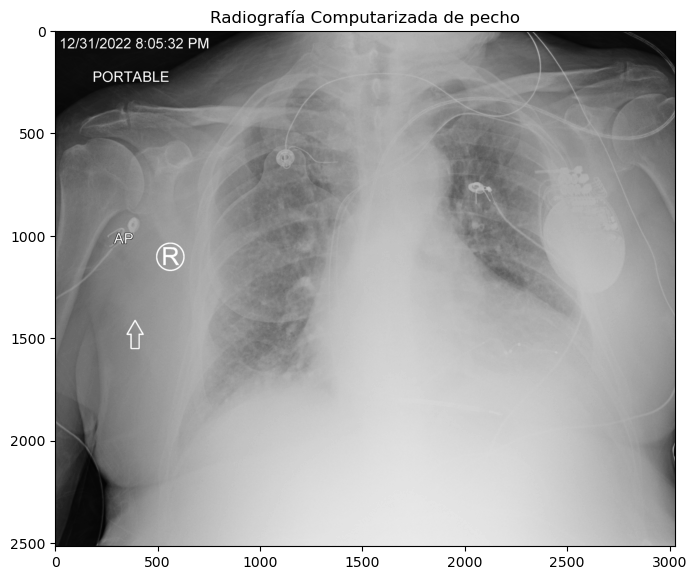

In [ ]:
img = dcm_data.pixel_array

plt.figure(figsize=(8, 8))
plt.imshow(img, cmap='gray')
plt.title('Radiografía Computarizada de pecho')
plt.show()

## 2. Comparación multimodal de imágenes

Para esta sección del trabajo se tienen tres estudios de una misma persona (una RM, una TC y una RX) del mismo segmento corporal. Dos de los estudios cuentan con un directorio que contiene multiples archivos DICOM, por lo cual se puede inferir que se trata los diferentes cortes (slices) de la imagen. Esto da a entender que esos dos directorios corresponden tanto al estudio de Resonancia Magnética, como al de Tomografía Computarizada. Esto se puede asumir porque tanto la Resonancia Magnética (MR) como la Tomografía Computarizada (TC) generan estudios volumétricos compuestos por múltiples cortes (slices), cada uno almacenado como un archivo DICOM independiente [2], a diferencia de la radiografía (RX) que usualmente es una sola imagen. Para verificar que esto es asi, a continuación se lee la información contenida en los archivos DICOM para cada modalidad, especificamente al leer el data_element correspondiente a `'Modality'`.

In [21]:
# se obtiene el archivo dicom de cada modalidad
ds1 = pydicom.dcmread('P2_modalidades/Modalidad1/201/1.3.46.670589.11.45555.5.0.8860.2024062407350848047.dcm')
ds2 = pydicom.dcmread('P2_modalidades/Modalidad2/ScalarVolume_13/IMG0001.dcm')
ds3 = pydicom.dcmread('P2_modalidades/Modalidad3/ScalarVolume_27/IMG0001.dcm')

# se lee la modalidad
print(f'Modalidad del primer directorio: {ds1.Modality}')
print(f'Modalidad del segundo directorio: {ds2.Modality}')
print(f'Modalidad del tercer directorio: {ds3.Modality}')


Modalidad del primer directorio: MR
Modalidad del segundo directorio: CR
Modalidad del tercer directorio: CT


Como se puede observar, la informacion contenida de los estudios de MR y CT si corresponden a los directorios donde se tenian multiples archivos DICOM.

A continuacion se procede a realizar una comparacion de la imagen entre las tres modalidades, haciendo uso de la informacion dentro de la metadata y la visualizacion de las tres imagenes. En particular, para la visualizacion de las imagenes se tomó como referencia la informacion que muestra la imagen CR, ya que esta cuenta con un solo archivo DICOM. Por ende, se ha decidido que tanto para la imagen RM y CT se va a visualizar el corte central se la serie, ya que este me puede dar informacion mas representativa del mismo segmento corporal.

- Calidad visual
- Resolución numérica (shape de la imagen, spacing, etc.)
- Diferencias de contraste percibidas

In [55]:
from operator import attrgetter

# IMAGEN MR

# Carpeta con los archivos DICOM
folderMR = 'P2_modalidades/Modalidad1/201'
MRnames = os.listdir('P2_modalidades/Modalidad1/201')
pathsMR = [os.path.join(folderMR, f) for f in MRnames] # directorios de los archivos dicom
dicomsMR = [pydicom.dcmread(p) for p in pathsMR] # se leen los archivos dicom
dicomsMR.sort(key=attrgetter('InstanceNumber')) # se ordenan de acuerdo al corte

# corte central de la serie
img_MR = dicomsMR[(len(dicomsMR)//2)-1].pixel_array # imagen MR

# IMAGEN CR
CR_data = pydicom.dcmread('P2_modalidades/Modalidad2/ScalarVolume_13/IMG0001.dcm')
img_CR = CR_data.pixel_array # imagen CR

# IMAGEN CT

# Carpeta con los archivos DICOM
folderCT = 'P2_modalidades/Modalidad3/ScalarVolume_27'
CTnames = os.listdir('P2_modalidades/Modalidad3/ScalarVolume_27')
pathsCT = [os.path.join(folderCT, f) for f in CTnames] # directorios de los archivos dicom
dicomsCT = [pydicom.dcmread(p) for p in pathsCT] # se leen los archivos dicom
dicomsCT.sort(key=attrgetter('InstanceNumber')) # se ordenan de acuerdo al corte

# corte central de la serie
img_CT = dicomsCT[(len(dicomsCT)//2)].pixel_array # imagen CT


In [ ]:
print('**** COMPARACION DE ESPACIADO EN LAS IMÁGENES ****')
print(f'Espaciado de imagen RM: {ds1.PixelSpacing}')
print(f'Espaciado de imagen CR: {ds2.ImagerPixelSpacing}')
print(f'Espaciado de imagen CT: {ds3.PixelSpacing}\n')

print('**** COMPARACION DE DIMENSIONES EN LAS IMÁGENES ****')
print(f'Dimensiones de imagen RM: {img_MR.shape}')
print(f'Dimensiones de imagen CR: {img_CR.shape}')
print(f'Dimensiones de imagen CT: {img_CT.shape}\n')

print('**** COMPARACION DE CANTIDAD DE CORTES EN LAS IMÁGENES ****')
print(f'Cantidad de cortes RM: {len(dicomsMR)}')
print(f'Cantidad de cortes CR: 1')
print(f'Cantidad de cortes CT: {len(dicomsCT)}\n')

**** COMPARACION DE ESPACIADO EN LAS IMÁGENES ****
Espaciado de imagen RM: [0.4716981, 0.4716981]
Espaciado de imagen CR: [.15, .15]
Espaciado de imagen CT: [.399608615, .399608615]

**** COMPARACION DE DIMENSIONES EN LAS IMÁGENES ****
Dimensiones de imagen RM: (640, 640)
Dimensiones de imagen CR: (2828, 2320)
Dimensiones de imagen CT: (512, 512)

**** COMPARACION DE CANTIDAD DE CORTES EN LAS IMÁGENES ****
Cantidad de cortes RM: 29
Cantidad de cortes CR: 1
Cantidad de cortes CT: 93



### Visualizacion de las tres modalidades

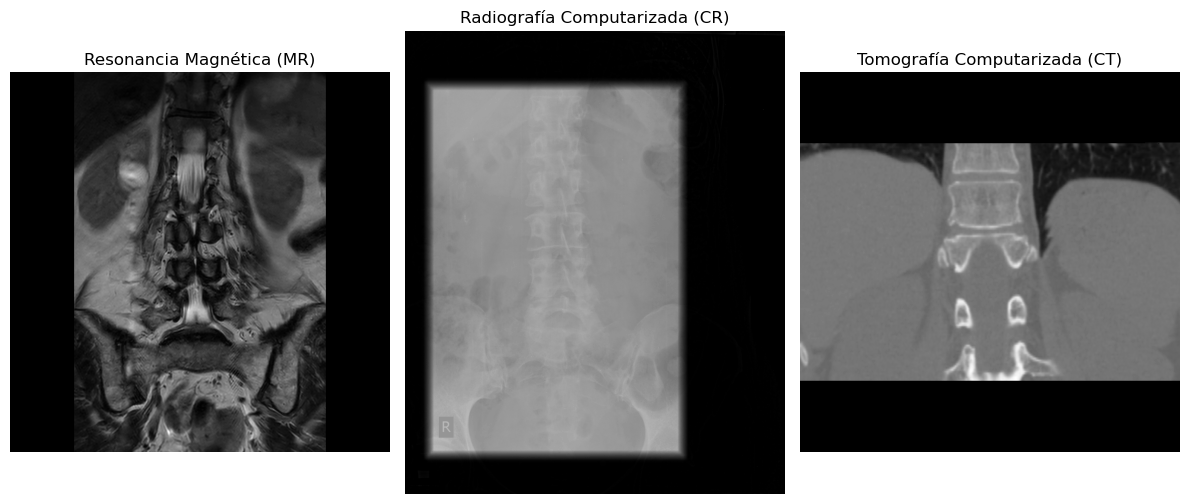

In [56]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(img_MR, cmap='gray')
plt.title('Resonancia Magnética (MR)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_CR, cmap='gray')
plt.title('Radiografía Computarizada (CR)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_CT, cmap='gray')
plt.title('Tomografía Computarizada (CT)')
plt.axis('off')
plt.tight_layout()
plt.show()

### Referencias

[1] Bidgood Jr, W. D., Horii, S. C., Prior, F. W., & Van Syckle, D. E. (1997). Understanding and using DICOM, the data interchange standard for biomedical imaging. Journal of the American Medical Informatics Association, 4(3), 199-212.

[2] Ramos Núñez, Oswaldo & villareal, manuel & angel, nairubia. (2014). SISTEMA DE ARCHIVO Y COMUNICACIÓN DE IMÁGENES EN UNA UNIDAD DE IMAGENOLOGIA (File system and communication of images in a Imaging Unit). Revista Electrónica Facultad de Ingeniería UVM. Volumen 8. 1109. 